In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
sns.set_theme()

In [4]:
plt.rcParams['figure.figsize'] = [8,8]

In [5]:
heights = pd.read_csv("heights.csv")

In [6]:
heights

,Father,Son
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113
...,...,...
1073,66.99681,70.75232
1074,71.33181,68.26774
1075,71.78314,69.30589
1076,70.73837,69.30199


/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


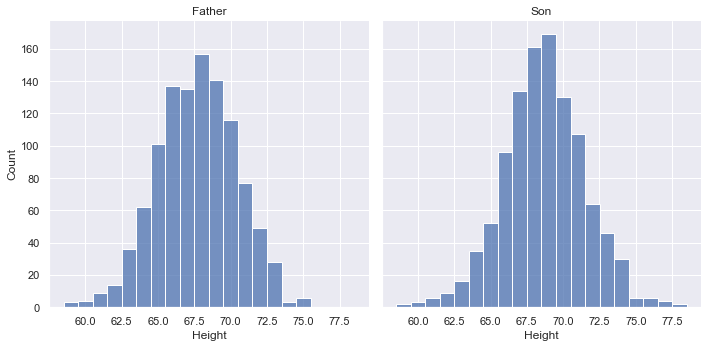

In [7]:
g = sns.displot( data=heights.melt(value_name="Height"), binwidth=1, x="Height", col="variable")
g.set_titles(col_template='{col_name}')

In [8]:
np.mean(heights['Father']) 

67.68709686456401

In [9]:
np.std(heights['Father'])

2.743594987591043

In [10]:
np.mean(heights['Son']) 

68.68406965677178

In [11]:
np.std(heights['Son'])

2.8133957698626495

In [12]:
heights['Group'] = round( heights['Father'] ).astype(int)

In [13]:
heights

,Father,Son,Group
0,65.04851,59.77827,65
1,63.25094,63.21404,63
2,64.95532,63.34242,65
3,65.75250,62.79238,66
4,61.13723,64.28113,61
...,...,...,...
1073,66.99681,70.75232,67
1074,71.33181,68.26774,71
1075,71.78314,69.30589,72
1076,70.73837,69.30199,71


In [ ]:
# heights.assign(Group=round( heights['Father'] ).astype(int))

In [14]:
son_stats = heights.groupby("Group").agg([np.size,np.mean,np.std])["Son"]

In [15]:
son_stats["size"] = son_stats["size"].astype(int)

/Users/mattrudd/opt/miniconda3/envs/regnagrok/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
son_stats

,size,mean,std
Group,,,
59,3,64.669410,0.661594
60,4,64.673850,2.776654
61,8,65.930072,2.158895
62,15,65.593267,1.775472
63,36,66.514124,2.909974
64,60,66.701389,2.307661
65,101,67.223182,2.534444
66,139,67.656250,2.350964
67,134,68.139773,2.237706


<AxesSubplot:xlabel='Father', ylabel='Son'>

/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


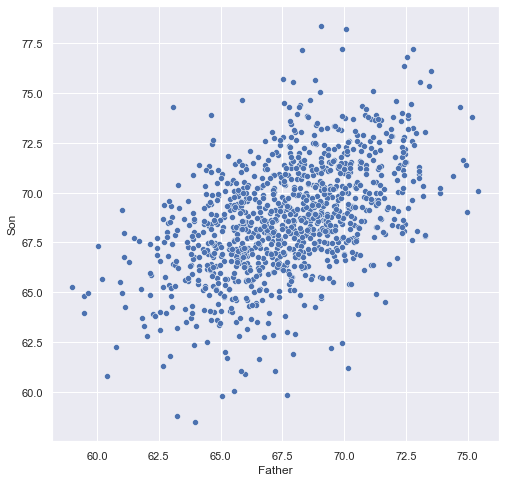

In [17]:
sns.scatterplot(data=heights, x="Father", y="Son")

<AxesSubplot:xlabel='Father', ylabel='Son'>

/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


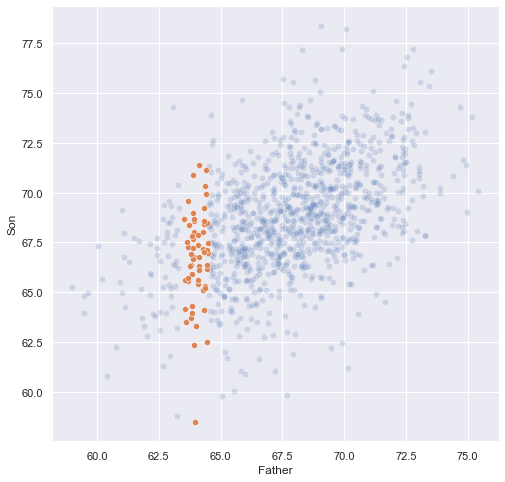

In [18]:
sns.scatterplot( data=heights[ heights["Group"] != 64 ], x="Father", y="Son", alpha=0.2)
sns.scatterplot( data=heights[ heights["Group"] == 64 ], x="Father", y="Son", alpha=1.0)

<AxesSubplot:xlabel='Father', ylabel='Son'>

/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


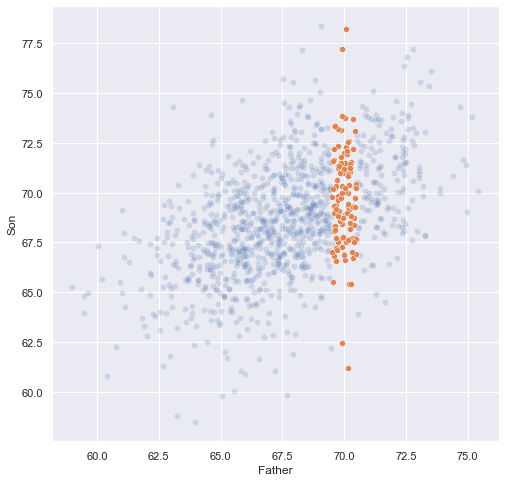

In [19]:
sns.scatterplot( data=heights[ heights["Group"] != 70 ], x="Father", y="Son", alpha=0.2)
sns.scatterplot( data=heights[ heights["Group"] == 70 ], x="Father", y="Son", alpha=1.0)

<AxesSubplot:xlabel='Father', ylabel='Son'>

/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


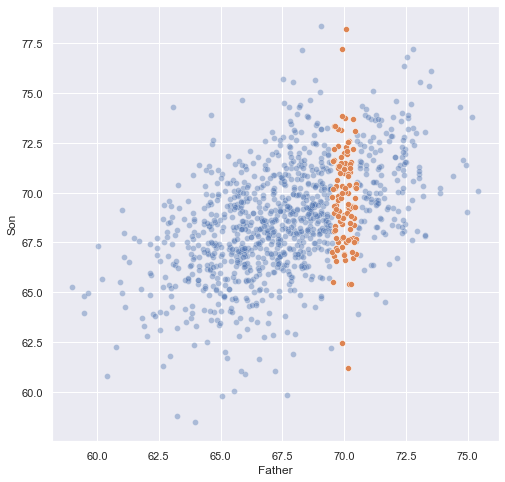

In [20]:
sns.scatterplot( data=heights.query("Group!=70"), x="Father", y="Son", alpha=0.4)
sns.scatterplot( data=heights.query("Group==70"), x="Father", y="Son", alpha=1.0)

In [21]:
heights.query("Group==64 or Group==70")

,Father,Son,Group
12,63.67063,65.67992,64
13,64.07386,65.43664,64
21,69.53480,65.51262,70
23,63.81016,66.37842,64
24,64.45650,66.14782,64
...,...,...,...
1045,70.34676,72.18324,70
1046,70.17300,72.55104,70
1054,70.37520,73.68578,70
1065,69.92407,77.23474,70


/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


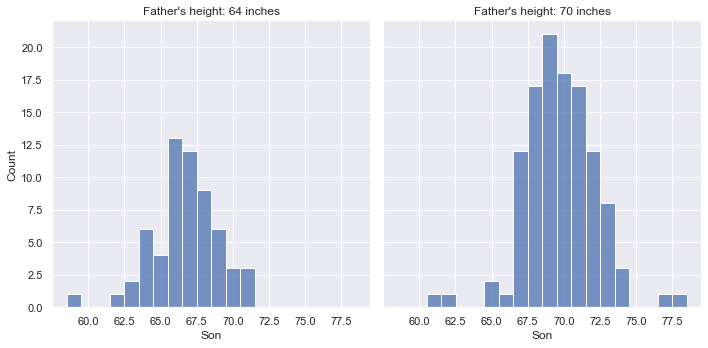

In [22]:
g = sns.displot( data=heights.query("Group==64 or Group==70"), binwidth=1, x="Son", col="Group")
g.set_titles(col_template="Father's height: {col_name} inches")

/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


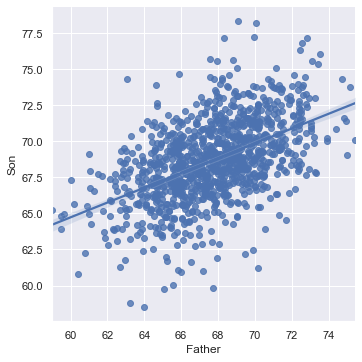

In [23]:
sns.lmplot( data=heights, x="Father", y="Son")

/Users/mattrudd/opt/miniconda3/envs/regnagrok/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


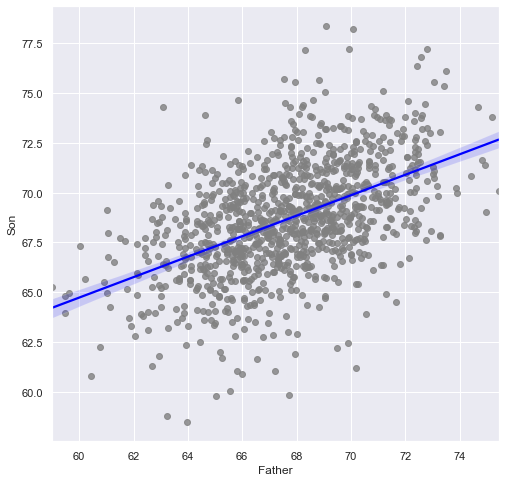

In [24]:
sns.regplot( data=heights, x="Father", y="Son",scatter_kws={"color": "gray"}, line_kws={"color": "blue"})
plt.savefig("test.png")

In [33]:
heights_model = ols('Son ~ Father', data=heights)

In [34]:
heights_fit = heights_model.fit()

In [35]:
print( heights_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    Son   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.12e-69
Time:                        13:53:24   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8866      1.832     18.493      0.0

In [28]:
np.corrcoef(heights.Father, heights.Son) # icky because it returns the covariance matrix -- a bit much here!

array([[1.        , 0.50133831],
       [0.50133831, 1.        ]])

In [36]:
heights.Father.corr(heights.Son)

0.5013383111723433

In [30]:
heights.corr()

,Father,Son,Group
Father,1.000000,0.501338,0.994538
Son,0.501338,1.000000,0.502962
Group,0.994538,0.502962,1.000000


In [31]:
from scipy.stats import pearsonr #icky because it also returns the pvalue!

In [32]:
pearsonr( heights.Father, heights.Son)

(0.5013383111723431, 1.1212675496318386e-69)